<a href="https://colab.research.google.com/github/Tonmoy-saha18/text-data-augmentation/blob/main/Text_Augmentation_prev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import random
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
#library for data augmentation
try:
  from textattack.augmentation import WordNetAugmenter
  from textattack.augmentation import EmbeddingAugmenter
  from textattack.augmentation import CLAREAugmenter
  from textattack.augmentation import EasyDataAugmenter
except ModuleNotFoundError:
  %pip install textattack
  %pip install tensorflow_text
  from textattack.augmentation import WordNetAugmenter
  from textattack.augmentation import EmbeddingAugmenter
  from textattack.augmentation import CLAREAugmenter
  from textattack.augmentation import EasyDataAugmenter
#google translator for backtranslation
try:
  import googletrans
  from googletrans.client import Translator
except:
  %pip install googletrans==3.1.0a0
  import googletrans
  from googletrans.client import Translator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 418 kB 7.7 MB/s 
     |████████████████████████████████| 769 kB 51.4 MB/s 
     |████████████████████████████████| 5.3 MB 49.5 MB/s 
     |████████████████████████████████| 125 kB 59.2 MB/s 
     |████████████████████████████████| 3.6 MB 35.0 MB/s 
     |████████████████████████████████| 60 kB 8.3 MB/s 
     |████████████████████████████████| 41.4 MB 1.2 MB/s 
     |████████████████████████████████| 365 kB 57.4 MB/s 
     |████████████████████████████████| 401 kB 46.7 MB/s 
     |████████████████████████████████| 212 kB 44.5 MB/s 
     |████████████████████████████████| 163 kB 54.6 MB/s 
     |████████████████████████████████| 115 kB 45.6 MB/s 
     |████████████████████████████████| 127 kB 48.9 MB/s 
     |████████████████████████████████| 7.6 MB 28.1 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |██████████████████████████████

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 18.2 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=c5cc52943fb1e70d5c661c614470b5ae62f258870f9daa5bf805f9189327ea19
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


# Augmentation Example

**Augmentation Based on cosine Similarity**

In [ ]:
em_augment = EmbeddingAugmenter()
em_augment.augment("Yeah hopefully, if tyler can't do it I could maybe ask around a bit")

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:16<00:00, 29.5MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpph3b5mrr.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


["Yeah hopefully, if tyler can't do it I could potentially ask around a bit"]

**Augment Based on Synonym**

In [ ]:
wc_augment = WordNetAugmenter()
wc_augment.augment("Yeah hopefully, if tyler can't do it I could maybe ask around a bit")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


["Yeah hopefully, if tyler can't do it I could maybe take around a bit"]

**Augment Text by eplacing, inserting, and merging with a pre-trained masked language model**

In [ ]:
clare_aug = CLAREAugmenter()
print(clare_aug.augment("Yeah hopefully, if tyler can't do it I could maybe ask around a bit"))

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/75.2M [00:00<?, ?B/s]

2022-10-12 15:09:39,871 loading file /root/.flair/models/upos-english-fast/b631371788604e95f27b6567fe7220e4a7e8d03201f3d862e6204dbf90f9f164.0afb95b43b32509bf4fcc3687f7c64157d8880d08f813124c1bd371c3d8ee3f7
2022-10-12 15:09:39,964 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, INTJ, PUNCT, VERB, PRON, NOUN, ADV, DET, ADJ, ADP, NUM, PROPN, CCONJ, PART, AUX, X, SYM, <START>, <STOP>
["Yeah hopefully, if tyler can't do it that I could maybe ask around a bit"]


**Augment by Easy Data augmentar**

In [ ]:
eda_aug = EasyDataAugmenter()
eda_aug.augment("Yeah hopefully, if tyler can't do it I could maybe ask around a bit")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


["Yeah hopefully, could tyler can't do it I if maybe ask around a bit",
 "Yeah hopefully, if tyler can't do it I could maybe around a bit",
 "Yeah hopefully, if peradventure tyler can't do it I could maybe ask around a bit",
 "Yeah hopefully, if tyler can't do it 1 could maybe ask around a bit"]

**Backtranslation Example**

In [ ]:
print("Number of Languages: ", len(googletrans.LANGUAGES))
print(googletrans.LANGUAGES)
print()
print("Hello World --> ", Translator().translate("Hello world", dest='fr').text)
bangla = Translator().translate("hello world", dest='fr').text
english = Translator().translate(bangla, dest='en').text
print(bangla, "--> ", english)

Number of Languages:  107
{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz

### Specific Example on one sentence

In [ ]:
sentence = "The girl I have seen yesterday on shopping mall is beautiful"
print('________________________________________________________')
print("Embedding Augmentor: \n")
print(em_augment.augment(sentence)[0])
print("________________________________________________________")
print('\n__________________________________________________________')
print("Wordnet Augmentor:\n")
print(wc_augment.augment(sentence)[0])
print('__________________________________________________________')
french = Translator().translate(sentence, dest='fr').text
english = Translator().translate(sentence, dest='en').text
print('________________________________________________________')
print("Back Translation: \n")
print("English --> French:", french)
print("French --> English:", english)

________________________________________________________
Embedding Augmentor: 

The girl I have seen yesterday on shopping supermarket is beautiful
________________________________________________________

__________________________________________________________
Wordnet Augmentor:

The girl I have learn yesterday on shopping mall is beautiful
__________________________________________________________
________________________________________________________
Back Translation: 

English --> French: La fille que j'ai vue hier au centre commercial est magnifique
French --> English: The girl I have seen yesterday on shopping mall is beautiful


# Data Preprocessing

In [ ]:
def replace_null(df):
  for col in df.columns:
    if is_string_dtype(col):
      si = SimpleImputer(strategy="most_frequent")
      si.fit(df[col])
      df[col] = si.transform(df[col]).flatten()
  return df

In [ ]:
def pre_processing(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'http\S+', '', text)
  return text

### Dataset loading

**`Loading bbc news dataset`**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/bbc_news.csv", na_values="?")
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [ ]:
df = replace_null(df)
df['description'] = df['description'].apply(pre_processing)
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,the ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"jeremy bowen was on the frontline in irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,one of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,the parents of the manchester arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,consumers are feeling the impact of higher ene...


**`Loading Spam Classification Dataset`**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/Dataset/Spam Classification/SMS_train.csv", encoding='cp1252',na_values="?")
df2.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df2 = replace_null(df2)
df2['Message_body'] = df2['Message_body'].apply(pre_processing)
df2.head()

,S. No.,Message_body,Label
0,1,rofl. its true to its name,Non-Spam
1,2,the guy did some bitching but i acted like i'd...,Non-Spam
2,3,"pity, * was in mood for that. so...any other s...",Non-Spam
3,4,will ü b going to esplanade fr home?,Non-Spam
4,5,this is the nd time we have tried contact u. ...,Spam


### `Data Augmentation Model`

In [ ]:
class MixAugmenter():
  def __init__(self, backtranslation=True, english_to='fr'):
    self.embeddingaugmenter = EmbeddingAugmenter()
    self.wordnetaugmenter = WordNetAugmenter()
    self.translator = Translator()
    self.translate_to = english_to
    self.backtranslation = backtranslation

  def __str__(self):
    return "MixAugmenter"

  def fit_dataset(self, dataframe, augment_column_name):
    x = dataframe.loc[:, dataframe.columns!=augment_column_name]
    augment_column = dataframe[augment_column_name]
    return (x, augment_column)

  def Augmentation(self, othercol, augment_col):
    augmentdata = []
    otherthings = []

    for j, text in enumerate(augment_col):
      temparray=[]
      for a in othercol:
        temparray.append(othercol[a].iloc[j])

      #augmentation by replacing synonym
      text2 = self.wordnetaugmenter.augment(text)
      if text2 != text and text2 not in augmentdata:
        augmentdata.append(text2)
        otherthings.append(temparray)

      #augmentation based on cosine similarity
      text2 = self.embeddingaugmenter.augment(text)
      if text2 != text and text2 not in augmentdata:
        augmentdata.append(text2)
        otherthings.append(temparray)

      #augmentation by using backtranlation
      if self.backtranslation:
        #converting english data to french
        french = self.translator.translate(text, dest=self.translate_to)
        #then converting french to english
        english = self.translator.translate(french.text, dest='en')

        if english != text and english not in augmentdata:
          augmentdata.append([english.text])
          otherthings.append(temparray)

    return augmentdata, otherthings

  def Augment(self, dataframe, col_name):
    other_col, augment_col = self.fit_dataset(dataframe, col_name)
    augment_data, data = self.Augmentation(other_col, augment_col)
    length = len(augment_data)
    npdata = np.array(data)
    npaug = np.array(augment_data)
    print(npdata.shape, npaug.shape)
    dataframe = pd.DataFrame()
    print(data)
    count = 0
    for col_nm in other_col:
      dataframe[col_nm] = npdata[:, count].flatten()
      # print(npdata[:, count].flatten())
      # print("###############################")
      count += 1
    dataframe[col_name] = npaug[:, 0].flatten()
    return dataframe

  def dataframe_to_csv(self, dataframe, path=".", filename='augmentdata.csv'):
    dataframe.to_csv(path + "/" + filename)
    return "Converted Sucessfully"

### `Applying augmentation on dataframe`




In [ ]:
augmentor = MixAugmenter()

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:08<00:00, 58.2MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp9551pd47.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
bbc_augment_data = augmentor.Augment(df, 'description')
bbc_augment_data.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,the ukrainian president says the country will ...
1,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,the ukrainian chairing says the country will n...
2,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,Ukraine's president says the country will not ...
3,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"jeremy bowen was on the frontline in irpin, as..."
4,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"jeremy bowen was on the frontline in irpin, as..."


In [ ]:
#svaing the augmentated data
augmented_data_folder_path = "/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/Augmented Data"

In [ ]:
augmentor.dataframe_to_csv(bbc_augment_data, augmented_data_folder_path,'bbc_augment_data.csv')

NameError: ignored

In [ ]:
spam_classification_augment_data = augmentor.Augment(df2, 'Message_body')
spam_classification_augment_data.head()

(2864, 2) (2864, 1)
[[1, 'Non-Spam'], [1, 'Non-Spam'], [1, 'Non-Spam'], [2, 'Non-Spam'], [2, 'Non-Spam'], [2, 'Non-Spam'], [3, 'Non-Spam'], [3, 'Non-Spam'], [3, 'Non-Spam'], [4, 'Non-Spam'], [4, 'Non-Spam'], [4, 'Non-Spam'], [5, 'Spam'], [5, 'Spam'], [5, 'Spam'], [6, 'Spam'], [6, 'Spam'], [6, 'Spam'], [7, 'Non-Spam'], [7, 'Non-Spam'], [7, 'Non-Spam'], [8, 'Non-Spam'], [8, 'Non-Spam'], [8, 'Non-Spam'], [9, 'Non-Spam'], [9, 'Non-Spam'], [9, 'Non-Spam'], [10, 'Non-Spam'], [10, 'Non-Spam'], [10, 'Non-Spam'], [11, 'Non-Spam'], [11, 'Non-Spam'], [11, 'Non-Spam'], [12, 'Non-Spam'], [12, 'Non-Spam'], [12, 'Non-Spam'], [13, 'Non-Spam'], [13, 'Non-Spam'], [13, 'Non-Spam'], [14, 'Non-Spam'], [14, 'Non-Spam'], [14, 'Non-Spam'], [15, 'Non-Spam'], [15, 'Non-Spam'], [15, 'Non-Spam'], [16, 'Non-Spam'], [16, 'Non-Spam'], [16, 'Non-Spam'], [17, 'Non-Spam'], [17, 'Non-Spam'], [17, 'Non-Spam'], [18, 'Non-Spam'], [18, 'Non-Spam'], [18, 'Non-Spam'], [19, 'Non-Spam'], [19, 'Non-Spam'], [19, 'Non-Spam'], [20,

,S. No.,Label,Message_body
0,1,Non-Spam,rofl. its true to its list
1,1,Non-Spam,rofl. its authentic to its name
2,1,Non-Spam,rof. it's true to its name
3,2,Non-Spam,the guy did some crab but i acted like i'd be ...
4,2,Non-Spam,the guy did some bitching but i acted like i'd...


In [ ]:
augmentor.dataframe_to_csv(spam_classification_augment_data, augmented_data_folder_path,'spam_classification_augmented_data.csv')

'Converted Sucessfully'

### `Necessary Function for classification`

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

def divide_into_train_test(X, Y):
  train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
  return train_x, test_x, train_y, test_y

def vectorize(train_x, test_x):
  vectorizer = CountVectorizer()
  vectorizer.fit(train_x)

  train_x = vectorizer.transform(train_x)
  test_x = vectorizer.transform(test_x)
  return train_x, test_x

def Plot_confusion_matrix(y_test, y_predict):
  ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
  plt.show()

def fit_multinomialnb_and_predict(train_x, train_y, test_x):
  mnb = MultinomialNB()
  clf = mnb.fit(train_x, train_y)
  predicty = mnb.predict(test_x)

  return predicty

### `Prediction for spam classification on original data by using MutinomialNB`

In [ ]:
X = df2['Message_body']
Y = df2['Label']
compare_x = []
compare_y = []
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((765,), (192,), (765,), (192,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((765, 2509), (192, 2509))

In [ ]:
predicty_original_df= fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_original = accuracy_score(test_y, predicty_original_df)
print("Accuracy of orginal Dataframe by using MultinomialNB: {} %".format(accuracy_original*100))
compare_x.append(train_x.shape[0])
compare_y.append(accuracy_original)

Accuracy of orginal Dataframe by using MultinomialNB: 96.35416666666666 %


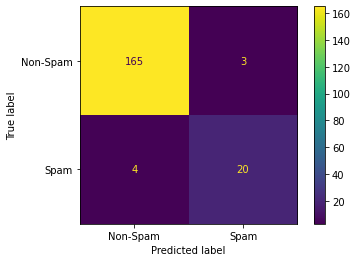

In [ ]:
Plot_confusion_matrix(test_y, predicty_original_df)

### `Prediction for spam classification on augmented data by using MultinomialNB`

In [ ]:
spam_augmented_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/Augmented Data/spam_classification_augmented_data.csv', na_values='?')

In [ ]:
X = spam_augmented_df['Message_body']
Y = spam_augmented_df['Label']
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2291,), (573,), (2291,), (573,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((2291, 4418), (573, 4418))

In [ ]:
predicty_augment_df = fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_augmented = accuracy_score(test_y, predicty_augment_df)
print("Accuracy of augmented Dataframe by using MultinomialNB: {} %".format(accuracy_augmented*100))
compare_x.append(train_x.shape[0])
compare_y.append(accuracy_augmented)

Accuracy of augmented Dataframe by using MultinomialNB: 98.77835951134381 %


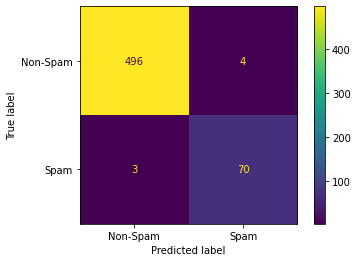

In [ ]:
Plot_confusion_matrix(test_y, predicty_augment_df)

### `Prediction for spam classification on original data and augmented data by using MultinomialNB`



In [ ]:
concatdf = pd.concat([df2, spam_augmented_df])
concatdf.shape

(3821, 4)

In [ ]:
X = concatdf['Message_body']
Y = concatdf['Label']
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((3056,), (765,), (3056,), (765,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((3056, 4429), (765, 4429))

In [ ]:
predicty_augment_df = fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_augmented = accuracy_score(test_y, predicty_augment_df)
print("Accuracy of augmented Dataframe by using MultinomialNB: {} %".format(accuracy_augmented*100))
compare_x.append(train_x.shape[0])
compare_y.append(accuracy_augmented)

Accuracy of augmented Dataframe by using MultinomialNB: 99.2156862745098 %


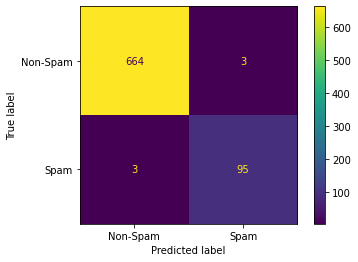

In [ ]:
Plot_confusion_matrix(test_y, predicty_augment_df)

### `Comparision for spam classification`

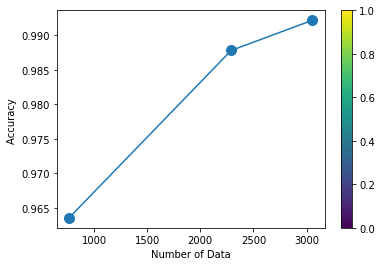

In [ ]:
plt.scatter(compare_x, compare_y, s=100)
plt.plot(compare_x, compare_y)
plt.colorbar()
plt.xlabel('Number of Data')
plt.ylabel('Accuracy ')
plt.show()

### `Twitter text sentiment analysis `





In [ ]:
twitter_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/Dataset/Corona_NLP_train.csv', encoding='cp850', na_values='?')
twitter_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
from sklearn.utils import shuffle
twitter_df = shuffle(twitter_df.iloc[:2000, :])
twitter_df = replace_null(twitter_df)
twitter_df['OriginalTweet'] = twitter_df['OriginalTweet'].apply(pre_processing)
twitter_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
620,4419,49371,Malaysia,16-03-2020,"if i don't die bc of covid-, i'll die from the...",Extremely Negative
637,4436,49388,Indianapolis IN,16-03-2020,is #coronavirus making @realdonaldtrump look b...,Positive
1068,4867,49819,Los angeles,17-03-2020,only people allowed in the grocery store at a...,Neutral
293,4092,49044,"Chicago, IL",16-03-2020,on #owhealth: times of turmoil allow for the f...,Positive
882,4681,49633,"Turfloop, South Africa",17-03-2020,south africa is not going to run out of food h...,Negative




```
 Augmenting twitter data
```




In [ ]:
twitter_df_augment_data = augmentor.Augment(twitter_df, 'OriginalTweet')
augmentor.dataframe_to_csv(twitter_df_augment_data, augmented_data_folder_path,'twitter_df_augment_data.csv')

(3594, 5) (3594, 1)
[[4419, 49371, 'Malaysia', '16-03-2020', 'Extremely Negative'], [4419, 49371, 'Malaysia', '16-03-2020', 'Extremely Negative'], [4419, 49371, 'Malaysia', '16-03-2020', 'Extremely Negative'], [4436, 49388, 'Indianapolis IN', '16-03-2020', 'Positive'], [4436, 49388, 'Indianapolis IN', '16-03-2020', 'Positive'], [4436, 49388, 'Indianapolis IN', '16-03-2020', 'Positive'], [4867, 49819, 'Los angeles', '17-03-2020', 'Neutral'], [4867, 49819, 'Los angeles', '17-03-2020', 'Neutral'], [4867, 49819, 'Los angeles', '17-03-2020', 'Neutral'], [4092, 49044, 'Chicago, IL', '16-03-2020', 'Positive'], [4092, 49044, 'Chicago, IL', '16-03-2020', 'Positive'], [4092, 49044, 'Chicago, IL', '16-03-2020', 'Positive'], [4681, 49633, 'Turfloop, South Africa', '17-03-2020', 'Negative'], [4681, 49633, 'Turfloop, South Africa', '17-03-2020', 'Negative'], [4681, 49633, 'Turfloop, South Africa', '17-03-2020', 'Negative'], [3813, 48765, nan, '16-03-2020', 'Positive'], [3813, 48765, nan, '16-03-2020

'Converted Sucessfully'

In [ ]:
twitter_df_augment_data.head()

,UserName,ScreenName,Location,TweetAt,Sentiment,OriginalTweet
0,4419,49371,Malaysia,16-03-2020,Extremely Negative,"if i don't die bc of covid-, i'll die from the..."
1,4419,49371,Malaysia,16-03-2020,Extremely Negative,"if i don't die bc of covid-, i'll die from the..."
2,4419,49371,Malaysia,16-03-2020,Extremely Negative,if I don't die from covid- I will die from lac...
3,4436,49388,Indianapolis IN,16-03-2020,Positive,is #coronavirus name @realdonaldtrump look bad...
4,4436,49388,Indianapolis IN,16-03-2020,Positive,is #coronavirus making @realdonaldtrump look h...


In [ ]:
X = twitter_df['OriginalTweet']
Y = twitter_df['Sentiment']
compare_x = []
compare_y = []
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((960,), (240,), (960,), (240,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((960, 5008), (240, 5008))

In [ ]:
x = []
y = []
predicty_twitter_df = fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_twitterdf = accuracy_score(test_y, predicty_twitter_df)
print("Accuracy of augmented Dataframe by using MultinomialNB: {} %".format(accuracy_twitterdf*100))
x.append(train_x.shape[0])
y.append(accuracy_twitterdf)

Accuracy of augmented Dataframe by using MultinomialNB: 42.916666666666664 %


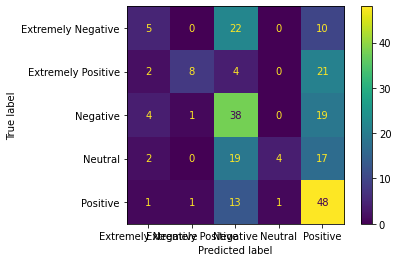

In [ ]:
Plot_confusion_matrix(test_y, predicty_twitter_df)

### `Twitter text sentiment nalysis with augmented data`

In [ ]:
twitter_augmented_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Text Augmentation/Augmented Data/twitter_df_augment_data.csv', na_values='?')
twitter_augmented_df.head()

,Unnamed: 0,UserName,ScreenName,Location,TweetAt,Sentiment,OriginalTweet
0,0,4419,49371,Malaysia,16-03-2020,Extremely Negative,"if i don't die bc of covid-, i'll die from the..."
1,1,4419,49371,Malaysia,16-03-2020,Extremely Negative,"if i don't die bc of covid-, i'll die from the..."
2,2,4419,49371,Malaysia,16-03-2020,Extremely Negative,if I don't die from covid- I will die from lac...
3,3,4436,49388,Indianapolis IN,16-03-2020,Positive,is #coronavirus name @realdonaldtrump look bad...
4,4,4436,49388,Indianapolis IN,16-03-2020,Positive,is #coronavirus making @realdonaldtrump look h...


In [ ]:
X = twitter_augmented_df['OriginalTweet']
Y = twitter_augmented_df['Sentiment']
compare_x = []
compare_y = []
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2875,), (719,), (2875,), (719,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((2875, 8311), (719, 8311))

In [ ]:
predicty_twitter_augmented_df = fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_twitterdf = accuracy_score(test_y, predicty_twitter_augmented_df)
print("Accuracy of augmented Dataframe by using MultinomialNB: {} %".format(accuracy_twitterdf*100))
x.append(train_x.shape[0])
y.append(accuracy_twitterdf)

Accuracy of augmented Dataframe by using MultinomialNB: 80.94575799721837 %


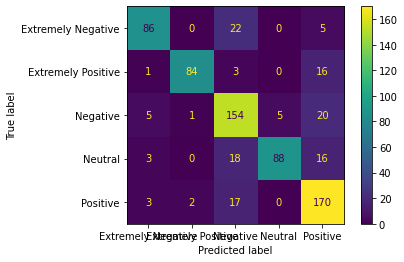

In [ ]:
Plot_confusion_matrix(test_y, predicty_twitter_augmented_df)

### `Concating augmented data with `

In [ ]:
concatdf = pd.concat([twitter_df, twitter_augmented_df])
concatdf.shape

(4794, 7)

In [ ]:
X = concatdf['OriginalTweet']
Y = concatdf['Sentiment']
train_x, test_x, train_y, test_y = divide_into_train_test(X, Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((3835,), (959,), (3835,), (959,))

In [ ]:
train_x, test_x = vectorize(train_x, test_x)
train_x.shape, test_x.shape

((3835, 8428), (959, 8428))

In [ ]:
predicty_augment_df = fit_multinomialnb_and_predict(train_x, train_y, test_x)
accuracy_augmented = accuracy_score(test_y, predicty_augment_df)
print("Accuracy of augmented Dataframe by using MultinomialNB: {} %".format(accuracy_augmented*100))
x.append(train_x.shape[0])
y.append(accuracy_augmented)

Accuracy of augmented Dataframe by using MultinomialNB: 88.84254431699688 %


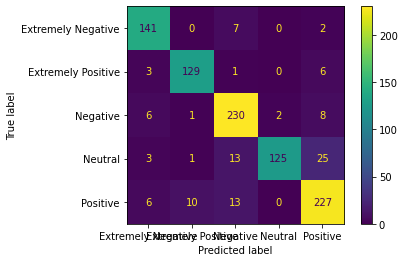

In [ ]:
Plot_confusion_matrix(test_y, predicty_augment_df)

### `Comparision for twitter sentiment analysis`

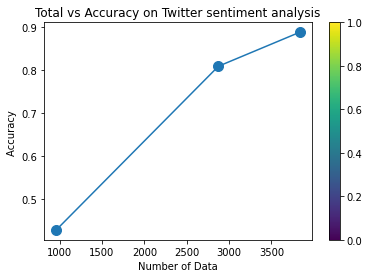

In [ ]:
plt.scatter(x, y, s=100)
plt.plot(x, y)
plt.title('Total vs Accuracy on Twitter sentiment analysis')
plt.colorbar()
plt.xlabel('Number of Data')
plt.ylabel('Accuracy ')
plt.show()

### `New section`

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Ham','Spam']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()